# import python library

In [167]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 1. Data info

In [107]:
df = pd.read_csv("/home/novi/Documents/data/kaggle/mental_health/survey.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [108]:
print(df.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [109]:
print(df.head(5))

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees   ...     \
0             No       Yes          Often            6-25   ...      
1             No        No         Rarely  More than 1000   ...      
2             No        No         Rarely            6-25   ...      
3            Yes       Yes          Often          26-100   ...      
4             No        No          Never         100-500   ...      

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No      

# 2. Features uniqueness

In [110]:
print("Gender")
print(np.unique(df.Gender))

Gender
['A little about you' 'Agender' 'All' 'Androgyne' 'Cis Female' 'Cis Male'
 'Cis Man' 'Enby' 'F' 'Femake' 'Female' 'Female ' 'Female (cis)'
 'Female (trans)' 'Genderqueer' 'Guy (-ish) ^_^' 'M' 'Mail' 'Make' 'Mal'
 'Male' 'Male ' 'Male (CIS)' 'Male-ish' 'Malr' 'Man' 'Nah' 'Neuter'
 'Trans woman' 'Trans-female' 'Woman' 'cis male' 'cis-female/femme' 'f'
 'femail' 'female' 'fluid' 'm' 'maile' 'male' 'male leaning androgynous'
 'msle' 'non-binary' 'ostensibly male, unsure what that really means' 'p'
 'queer' 'queer/she/they' 'something kinda male?' 'woman']


In [111]:
print("Country")
print(np.unique(df.Country))

Country
['Australia' 'Austria' 'Bahamas, The' 'Belgium' 'Bosnia and Herzegovina'
 'Brazil' 'Bulgaria' 'Canada' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Georgia' 'Germany'
 'Greece' 'Hungary' 'India' 'Ireland' 'Israel' 'Italy' 'Japan' 'Latvia'
 'Mexico' 'Moldova' 'Netherlands' 'New Zealand' 'Nigeria' 'Norway'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia' 'Singapore'
 'Slovenia' 'South Africa' 'Spain' 'Sweden' 'Switzerland' 'Thailand'
 'United Kingdom' 'United States' 'Uruguay' 'Zimbabwe']


In [112]:
print("Age")
print(np.unique(df.Age))

Age
[      -1726         -29          -1           5           8          11
          18          19          20          21          22          23
          24          25          26          27          28          29
          30          31          32          33          34          35
          36          37          38          39          40          41
          42          43          44          45          46          47
          48          49          50          51          53          54
          55          56          57          58          60          61
          62          65          72         329 99999999999]


# 3. Columns with missing data

In [12]:
# create dataframe with missing value
missing = df.copy()
missing = missing.T
null_val = missing.isnull().sum(axis=1)
missing["valid_count"] = (len(missing.columns)-null_val)/len(missing.columns)
missing["na_count"] = null_val/len(missing.columns)
missing[["valid_count","na_count"]].sort_values("na_count",ascending=True)

,valid_count,na_count
Timestamp,1.000000,0.000000
mental_vs_physical,1.000000,0.000000
phys_health_interview,1.000000,0.000000
mental_health_interview,1.000000,0.000000
supervisor,1.000000,0.000000
coworkers,1.000000,0.000000
phys_health_consequence,1.000000,0.000000
mental_health_consequence,1.000000,0.000000
leave,1.000000,0.000000
anonymity,1.000000,0.000000


There are only two columns with missing value: self_employed and work_interfere. We need to impute these fields. However, the values in Gender and Age do not make any sense. Hence, we also need to handle these fields also. We can drop fields like state and comments, as state can be represented by Country and comments has more than 80% missing data.

# 4. Data cleaning

In [113]:
# remove state and comments columns
df = df.drop(["state","comments"],axis=1)

In [114]:
# creating age range
age = pd.Series(df.Age)
age[age<18] = df.Age.median()
df.Age = age
age = pd.Series(df.Age)
age[age>100] = df.Age.median()
df.Age = age
df.Age = df.Age.astype(int)
# mapping Age to AgeRange
df["AgeRange"] = pd.cut(df.Age,[0,20,40,60,100],labels=["0-20","20-40","40-60","60-100"])
print("Age range")
print(np.unique(df.AgeRange))

Age range
['0-20' '20-40' '40-60' '60-100']


In [115]:
# mapping different gender to Male, Female and Trans-gender
df.Gender = df.Gender.str.lower()
male_opt = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man", "msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_opt = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "trans","genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means","a little about you","p"] 
female_opt = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
for row,col in df.iterrows():
    if col.Gender in male_opt:
        df.Gender.replace(to_replace=col.Gender,value="Male",inplace=True)
    if col.Gender in female_opt:
        df.Gender.replace(to_replace=col.Gender,value="Female",inplace=True)
    if col.Gender in trans_opt:
        df.Gender.replace(to_replace=col.Gender,value="Trans",inplace=True)
print("Gender")
print(np.unique(df.Gender))

Gender
['Female' 'Male' 'Trans']


In [116]:
# filling empty values in self_employed
df.self_employed = df.self_employed.fillna(df.self_employed.mode()[0])
print("Self employed")
print(np.unique(df.self_employed))

Self employed
['No' 'Yes']


In [117]:
# implement unsupervised nearest neighbors algorithm to impute the missing data 
# copy data
data = df.copy()
# drop Timestamp
data = data.drop(columns=["Timestamp","Age","work_interfere"])
# assign column self_employed and work_interfere in some variables
wi = df["work_interfere"]
# index of missing value
idx = np.reshape(np.where(wi.isnull()),-1)
# index all samples
adx = np.arange((data.shape[0]))
# use non missing samples as training data
tr = list(set(adx)-set(idx))
# replace AgeRange name with Age
data = data.rename(columns={"AgeRange":"Age"})
print(data.columns)

Index([u'Gender', u'Country', u'self_employed', u'family_history',
       u'treatment', u'no_employees', u'remote_work', u'tech_company',
       u'benefits', u'care_options', u'wellness_program', u'seek_help',
       u'anonymity', u'leave', u'mental_health_consequence',
       u'phys_health_consequence', u'coworkers', u'supervisor',
       u'mental_health_interview', u'phys_health_interview',
       u'mental_vs_physical', u'obs_consequence', u'Age'],
      dtype='object')


In [118]:
# dictionary name
label_dict = {}
for col in data:
    #classes = np.unique(data[col])
    # use LabelEncoder to normalize category label into 0 - n_category-1
    encoder = LabelEncoder()
    encoder.fit(data[col])
    map_name = dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
    data[col] = encoder.transform(data[col])
    # save category label in some variables
    lkey = col + "_label"
    lval = [map_name]
    label_dict[lkey] = lval

print(label_dict)

{'care_options_label': [{'Not sure': 1, 'Yes': 2, 'No': 0}], 'family_history_label': [{'Yes': 1, 'No': 0}], 'Country_label': [{'Brazil': 5, 'Canada': 7, 'Italy': 23, 'Czech Republic': 12, 'Costa Rica': 10, 'France': 15, 'Netherlands': 28, 'Ireland': 21, 'Nigeria': 30, 'Bahamas, The': 2, 'Thailand': 43, 'Israel': 22, 'Australia': 0, 'Singapore': 37, 'Norway': 31, 'Slovenia': 38, 'Zimbabwe': 47, 'China': 8, 'Bosnia and Herzegovina': 4, 'Belgium': 3, 'Germany': 17, 'Poland': 33, 'Spain': 40, 'Georgia': 16, 'Denmark': 13, 'Philippines': 32, 'Finland': 14, 'Moldova': 27, 'United States': 45, 'Sweden': 41, 'Latvia': 25, 'Croatia': 11, 'Japan': 24, 'Switzerland': 42, 'Uruguay': 46, 'New Zealand': 29, 'Russia': 36, 'Bulgaria': 6, 'Romania': 35, 'Portugal': 34, 'Mexico': 26, 'South Africa': 39, 'India': 20, 'United Kingdom': 44, 'Austria': 1, 'Colombia': 9, 'Greece': 18, 'Hungary': 19}], 'wellness_program_label': [{'Yes': 2, "Don't know": 0, 'No': 1}], 'treatment_label': [{'Yes': 1, 'No': 0}], 

In [120]:
# replace value of work_interfere using knn algorithm, with default n_neighbors=5
nn = KNeighborsClassifier()
nn.fit(data.loc[tr],wi[tr])

df.loc[idx,"work_interfere"] = nn.predict(data.loc[idx])
print(df.loc[idx,"work_interfere"])

19          Often
26      Sometimes
37      Sometimes
38          Never
41          Never
46          Never
47          Never
51          Never
52          Never
54          Never
56      Sometimes
58          Never
63      Sometimes
68          Never
73          Never
75         Rarely
76          Never
85          Never
89          Never
92          Never
93      Sometimes
102         Never
114         Never
119         Never
121         Never
126        Rarely
133     Sometimes
138         Never
139     Sometimes
143         Never
          ...    
1039       Rarely
1041       Rarely
1069    Sometimes
1085    Sometimes
1098    Sometimes
1100        Never
1112        Never
1114        Never
1124    Sometimes
1129    Sometimes
1131    Sometimes
1137        Never
1143    Sometimes
1162        Never
1170        Never
1171        Never
1175    Sometimes
1188    Sometimes
1194        Never
1199       Rarely
1202    Sometimes
1203       Rarely
1210       Rarely
1215        Often
1218      

In [121]:
# data after cleaning
print(df.head(5))

             Timestamp  Age  Gender         Country self_employed  \
0  2014-08-27 11:29:31   37  Female   United States            No   
1  2014-08-27 11:29:37   44    Male   United States            No   
2  2014-08-27 11:29:44   32    Male          Canada            No   
3  2014-08-27 11:29:46   31    Male  United Kingdom            No   
4  2014-08-27 11:30:22   31    Male   United States            No   

  family_history treatment work_interfere    no_employees remote_work  \
0             No       Yes          Often            6-25          No   
1             No        No         Rarely  More than 1000          No   
2             No        No         Rarely            6-25          No   
3            Yes       Yes          Often          26-100          No   
4             No        No          Never         100-500         Yes   

    ...                  leave mental_health_consequence  \
0   ...          Somewhat easy                        No   
1   ...             Don't 

# 5. Features description

5.1 Features defined the employees situation

Text(0.5,1,'Percentage of Gender')

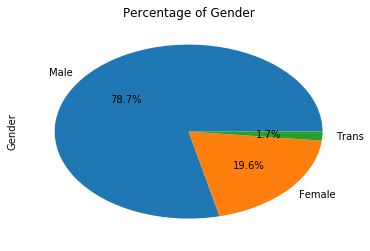

In [609]:
# plot percentage of gender involved in survey
df.Gender.value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage of Gender")

Text(0.5,1,'Employee Age')

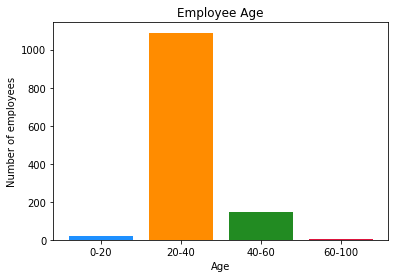

In [608]:
# histogram employees range age in the data
age_count = df.AgeRange.value_counts()
plt.bar(np.arange(4),age_count[sorted(age_count.index)].values,color=["DodgerBlue","DarkOrange","ForestGreen","Crimson"])
plt.xticks(np.arange(4),sorted(age_count.index))
plt.xlabel("Age")
plt.ylabel("Number of employees")
plt.title("Employee Age")

Text(0,0.5,'Number of employees')

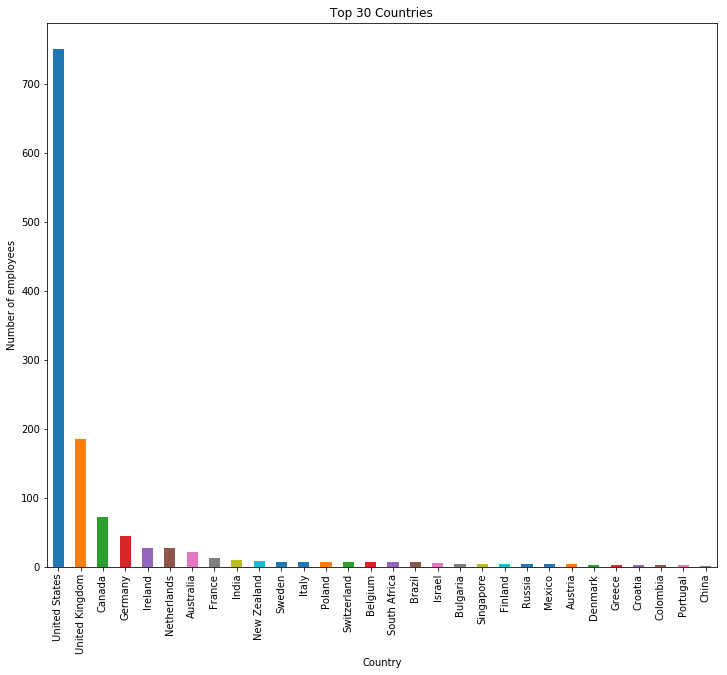

In [610]:
# histogram of top 30 countries in the data
plt.figure(figsize=(12,10))
df.Country.value_counts().nlargest(30).plot.bar()
plt.title("Top 30 Countries")
plt.xlabel("Country")
plt.ylabel("Number of employees")

In general, there are more male employees involved in the survey than female or trans-gender. More than 1000 employees of age between 20-40 is in the survey. United States and United Kingdom contribute mostly in the data set. 

Text(0,0.5,'Number of employees')

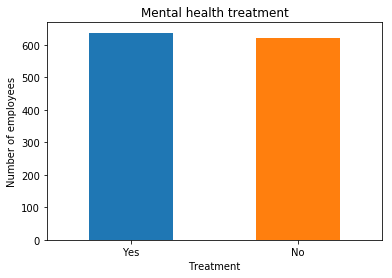

In [612]:
# histogram of employees who take and neglect mental health treatment
df.treatment.value_counts().plot.bar()
plt.title("Mental health treatment")
plt.xlabel("Treatment")
plt.xticks(rotation=360)
plt.ylabel("Number of employees")

The number of employees who got mental health treatment is slightly higher than ignored one.

Text(0,0.5,'Number of employees')

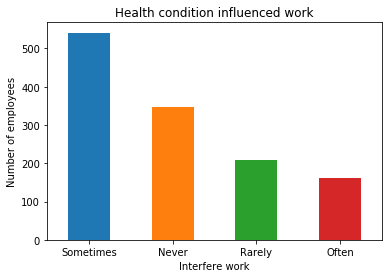

In [123]:
# histogram of employees health condition influenced their work
df.work_interfere.value_counts().plot.bar()
plt.title("Health condition influenced work")
plt.xlabel("Interfere work")
plt.xticks(rotation=360)
plt.ylabel("Number of employees")

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64


Text(0.5,1,'Employees at different company size')

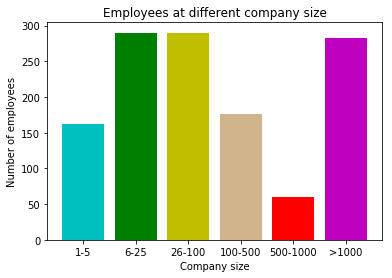

In [620]:
no_emp = df.no_employees.value_counts()
print(no_emp)
# histogram of employees at different company
plt.bar(np.arange(6),[162,290,289,176,60,282],color=["C","G","Y","Tan","R","M"])
plt.xticks(np.arange(6),["1-5","6-25","26-100","100-500","500-1000",">1000"])
plt.xlabel("Company size")
plt.ylabel("Number of employees")
plt.title("Employees at different company size")

Text(0,0.5,'Remote work')

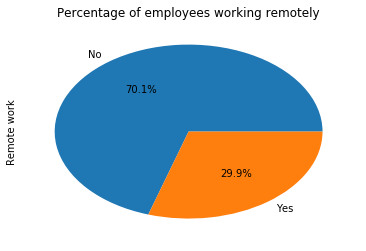

In [615]:
# percentage of employees working remotely
df.remote_work.value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage of employees working remotely")
plt.ylabel("Remote work")

Text(0,0.5,'Self employed')

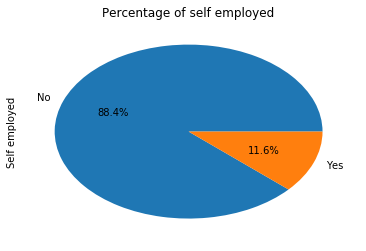

In [617]:
# percentage of self employed
df.self_employed.value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage of self employed")
plt.ylabel("Self employed")

Text(0,0.5,'Family history')

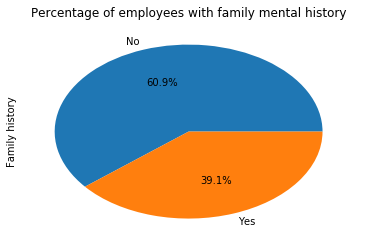

In [618]:
# percentage of employees with family health history 
df.family_history.value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage of employees with family mental history")
plt.ylabel("Family history")

The data is mostly taken from companies with less than 500 employees, where 70% employees work at the office. Around 88% employees are self-employed and 61% without family mental history.

5.2 Features describing the employer situation

Text(0,0.5,'Number of employees')

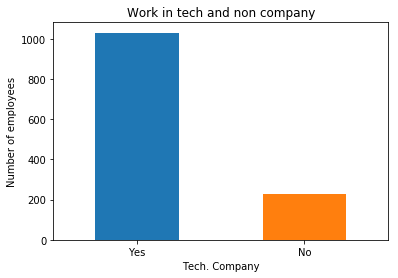

In [624]:
# histogram of employees working in tech and non tech company
df.tech_company.value_counts().plot.bar()
plt.title("Work in tech and non company")
plt.xlabel("Tech. Company")
plt.xticks(rotation=360)
plt.ylabel("Number of employees")

More than 1000 employees work in tech company and only around 200 employees in non tech company.

["Don't know", 'No', 'Yes']


Text(0,0.5,'Number of employees')

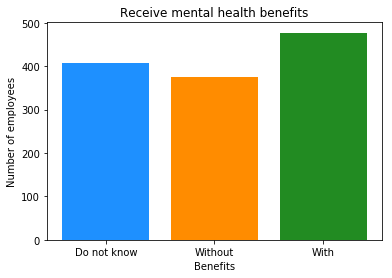

In [637]:
# histogram of employees who received mental health benefits from employer
ben = df.benefits.value_counts()
ben_index = sorted(ben.index)
print(sorted(ben.index))
plt.title("Receive mental health benefits")
plt.bar(np.arange(3),ben.loc[ben_index],color=["DodgerBlue","DarkOrange","ForestGreen"])
plt.xlabel("Benefits")
plt.xticks(np.arange(3),["Do not know","Without","With"])
plt.ylabel("Number of employees")

Over 400 employees don't receive health benefits from their employers and approximately 500 employees receive it. However there are 400 employees in the survey don't know whether they receive health benefits or not.

Text(0,0.5,'Mental Care')

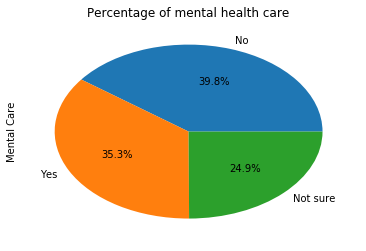

In [124]:
# histogram of employees who received mental health care from their employer
df.care_options.value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage of mental health care")
plt.ylabel("Mental Care")

Approximately 25% of the employees are not sure about mental health care from their employers. More than 39% do not receive any mental health care and only 35% have it.

Text(0,0.5,'Wellness program')

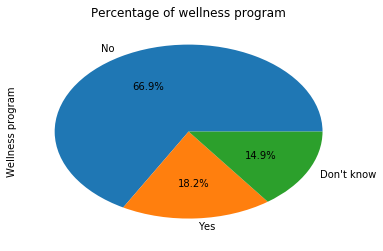

In [627]:
# percentage of employer provided wellness program
df.wellness_program.value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage of wellness program")
plt.ylabel("Wellness program")

Text(0,0.5,'Health resources')

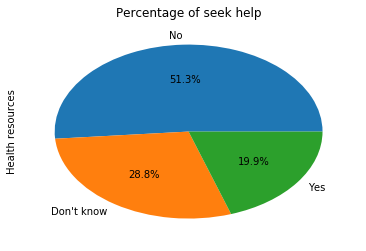

In [628]:
# percentage of employer provided seek help 
df.seek_help.value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage of seek help")
plt.ylabel("Health resources")

Above 50% of the employees do not receive mental programs from their employers. Less than 20% employees get health care program.

Text(0,0.5,'Number of Employees')

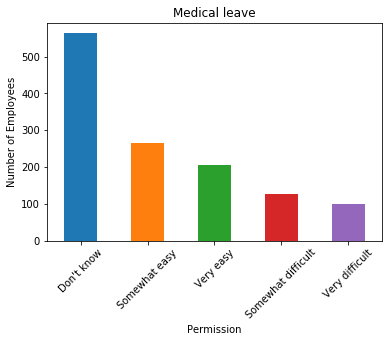

In [629]:
# histogram of employees who understand the medical leave in their company
df.leave.value_counts().plot.bar()
plt.title("Medical leave")
plt.xlabel("Permission")
plt.xticks(rotation=45)
plt.ylabel("Number of Employees")

There are more than 500 employees who do not know about the procedure for using their medical leave. For the employers who are easily give permission, less than 500 employees use their medical leaves. Around 300 employees have difficulties to use their leave permission.

Text(0,0.5,'Anonymity protection')

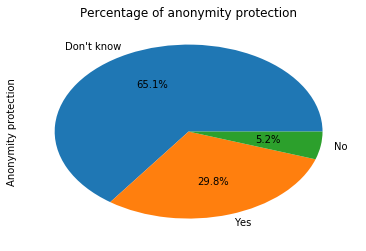

In [298]:
# percentage of employees who understand about anonymity protection
df.anonymity.value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage of anonymity protection")
plt.ylabel("Anonymity protection")

Over 65% of the employees do not know about the anonymity protection when they take advantage of their health treatment. Below 30% employees know about the protection and only 5% do not know.

['Maybe', 'No', 'Yes']


Text(0.5,1,'Discuss health problem')

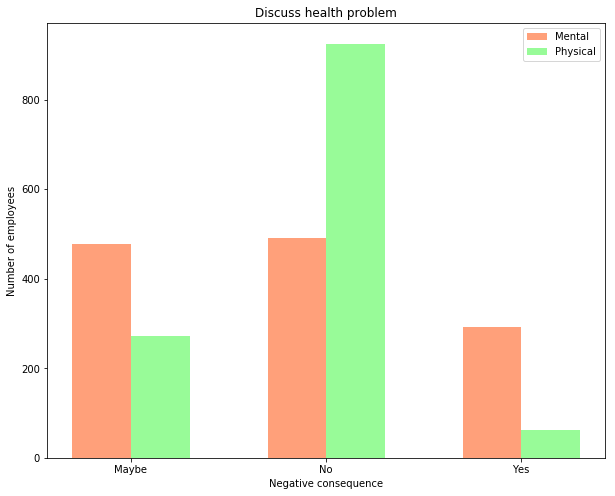

In [630]:
# consequences of discussing mental health problem
me = df.mental_health_consequence.value_counts()
# consequences of discussing physical health problem
ph = df.phys_health_consequence.value_counts()
# index
me_index = sorted(me.index)
print(me_index)
ind = np.arange(3)
width = 0.3
# histogram of whether employees receive negative consequences when discussing about
# mental and physical health
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(ind-width/2, me.loc[me_index], width=width, color="LightSalmon", label="Mental")
ax.bar(ind+width/2, ph.loc[me_index], width=width, color="PaleGreen", label="Physical")
ax.set_xticks(ind)
ax.set_xticklabels(me_index)
ax.legend(["Mental","Physical"])
ax.set_xlabel("Negative consequence")
ax.set_ylabel("Number of employees")
ax.set_title("Discuss health problem")

Around 1400 employees in the survey say that they never receive negative treatments when discussing about their physical and mental health. Less than 400 employees receive negative consequences and around 800 employees are not sure about the consequences when discussing about their issues. The negative effect happen on mental health discussion more often than physical.

Text(0.5,1,'Health problem in interview')

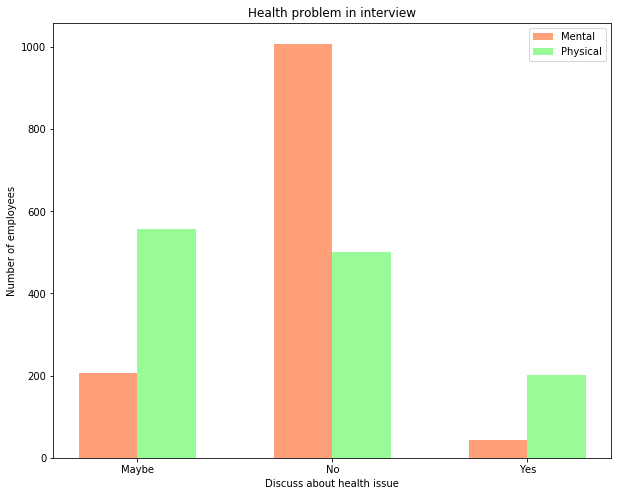

In [631]:
# talking about mental health problem with potential company in an interview
me_int = df.mental_health_interview.value_counts()
# talking about physical health problem with potential company in an interview
ph_int = df.phys_health_interview.value_counts()
ind = np.arange(3)
width = 0.3
# histogram of whether employees talked about their mental and physical health
# in an interview
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(ind-width/2, me_int.loc[me_index], width=width, color="LightSalmon", label="Mental")
ax.bar(ind+width/2, ph_int.loc[me_index], width=width, color="PaleGreen", label="Physical")
ax.set_xticks(ind)
ax.set_xticklabels(me_index)
ax.legend(["Mental","Physical"])
ax.set_xlabel("Discuss about health issue")
ax.set_ylabel("Number of employees")
ax.set_title("Health problem in interview")

More than 1500 employees do not want to discuss with potential employer about their health problem, only less than 300 employees decide to talk about it. Around 700 people are not sure for talking about their health problem during an interview session. People feels equally comfortable to discuss about their mental or health issues.

['Some of them', 'No', 'Yes']


Text(0.5,1,'Health problem discussion')

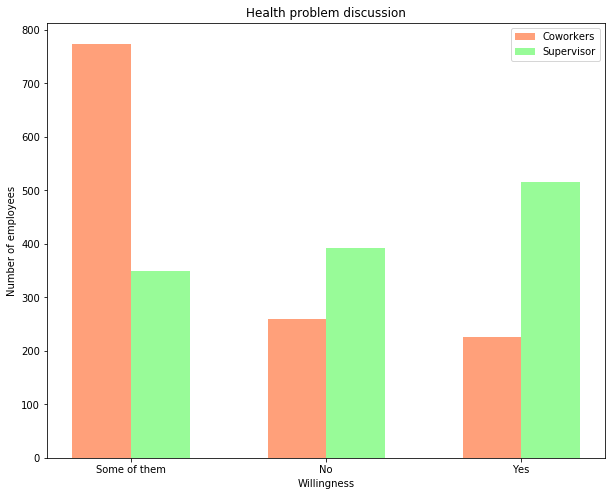

In [632]:
# employees talked with their coworkers
co = df.coworkers.value_counts()
# employees talked with their supervisor
su = df.supervisor.value_counts()
co_index = ["Some of them", "No", "Yes"]#sorted(co.index)
print(co_index)
ind = np.arange(3)
width = 0.3
# histogram of employees willingness to talk about their mental and physical health
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(ind-width/2, co.loc[co_index], width=width, color="LightSalmon", label="Coworkers")
ax.bar(ind+width/2, su.loc[co_index], width=width, color="PaleGreen", label="Supervisor")
ax.set_xticks(ind)
ax.set_xticklabels(co_index)
ax.legend(["Coworkers","Supervisor"])
ax.set_xlabel("Willingness")
ax.set_ylabel("Number of employees")
ax.set_title("Health problem discussion")

Around 900 employees prefer to discuss about their health issue with their supervisor and approximately 1000 employees choose their coworkers. Less than 700 employees choose not to talk about this issue either with their coworkers or supervisors. 

Text(0.5,1,'Treat mental and physical health equally')

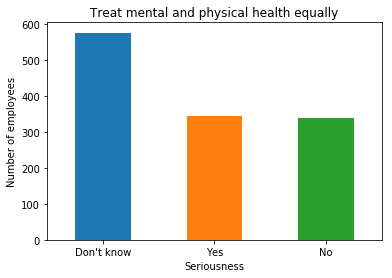

In [633]:
# histogram of employees considering employer takes mental health as seriously as physical health
df.mental_vs_physical.value_counts().plot.bar()
plt.xticks(rotation=360)
plt.xlabel("Seriousness")
plt.ylabel("Number of employees")
plt.title("Treat mental and physical health equally")

Less than 600 employees do not know about their employers seriousness dealing with mental and physical problems. Around 700 people considers the employer treated mental and physical health problem equally the same.

Text(0.5,1,'Employees heard about observed negative consequence')

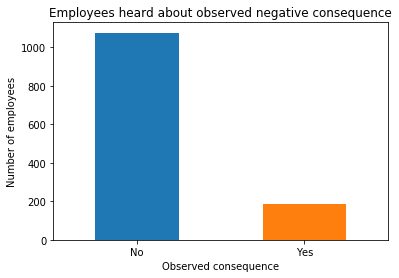

In [318]:
# histogram of employees heard of observed negative consequences in their workplace 
df.obs_consequence.value_counts().plot.bar()
plt.xticks(rotation=360)
plt.xlabel("Observed consequence")
plt.ylabel("Number of employees")
plt.title("Observed negative consequence")

Above 1000 employees do not know observed negative consequence in their workplace and only 200 people know about it.

# 6. Features correlation

In [134]:
# data is taken from 2014-2016
df["Timestamp"] = pd.to_datetime(df.Timestamp)
df["Year"] = df.Timestamp.dt.year
print(np.unique(df["Year"]))

[2014 2015 2016]


6.1 Mental health treatment and gender

Text(0.5,1,'Female employees')

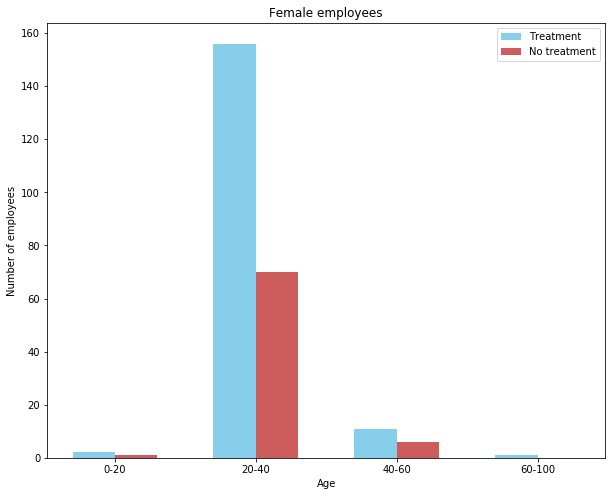

In [638]:
# age range of female employees who receive health treatment
fe_yes = df["AgeRange"][(df.treatment=="Yes") & (df["Gender"]=="Female")].value_counts()
# age range of female employees who do not receive health treatment
fe_no = df["AgeRange"][(df.treatment=="No") & (df["Gender"]=="Female")].value_counts()
age_index = sorted(fe_yes.index)
ind = np.arange(4)
width = 0.3
# histogram of female employees in different age range
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(ind-width/2, fe_yes.loc[age_index], width=width, color="SkyBlue", label="Treatment")
ax.bar(ind+width/2, fe_no.loc[age_index], width=width, color="IndianRed", label="No treatment")
ax.set_xticks(ind)
ax.set_xticklabels(age_index)
ax.legend(["Treatment","No treatment"])
ax.set_xlabel("Age")
ax.set_ylabel("Number of employees")
ax.set_title("Female employees")

Female employees between age 20-40 years old use their health treatment more often rather than ignore it. The number of the employees used their health treatment is double than the one who does not use it.

Text(0.5,1,'Male employees')

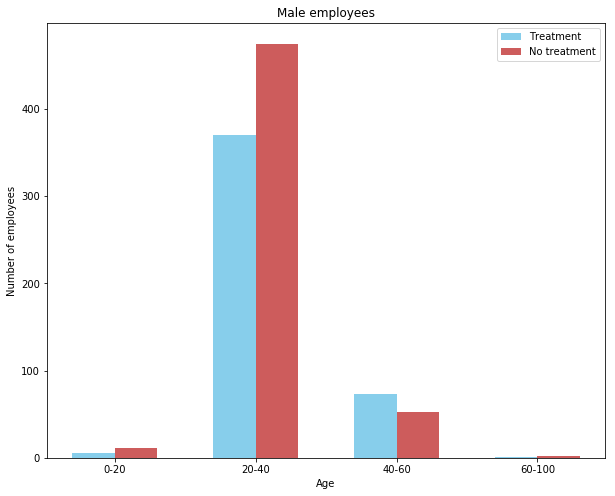

In [639]:
# age range of male employees who receive health treatment
ma_yes = df["AgeRange"][(df.treatment=="Yes") & (df["Gender"]=="Male")].value_counts()
# age range of male employees who do not receive health treatment
ma_no = df["AgeRange"][(df.treatment=="No") & (df["Gender"]=="Male")].value_counts()
fig, ax = plt.subplots(figsize=(10,8))
# histogram of male employees in different age range
ax.bar(ind-width/2, ma_yes.loc[age_index], width=width, color="SkyBlue", label="Treatment")
ax.bar(ind+width/2, ma_no.loc[age_index], width=width, color="IndianRed", label="No treatment")
ax.set_xticks(ind)
ax.set_xticklabels(age_index)
ax.legend(["Treatment","No treatment"])
ax.set_xlabel("Age")
ax.set_ylabel("Number of employees")
ax.set_title("Male employees")

Male employees between age 20-60 show less interest in their mental health treatment, the ratio between using and ignoring treatement is 9:10. 

6.2 Employees condition in United States

Text(0.5,0.98,'Condition in United States')

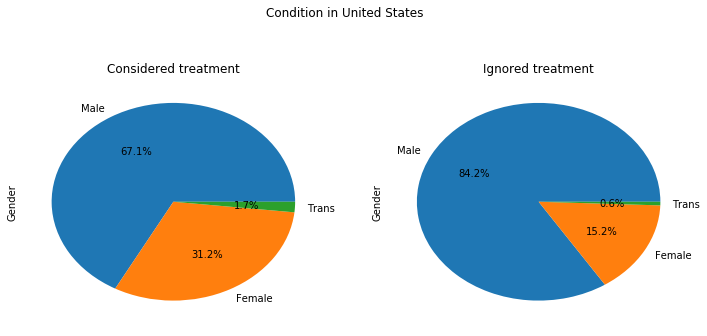

In [130]:
# employees gender in US and receive health treatment
us_yes = df["Gender"][(df["Country"]=="United States") & (df["treatment"]=="Yes")].value_counts()
plt.figure(figsize=(12,10))
plt.subplot(221)
us_yes.plot(kind="pie", autopct="%1.1f%%")
plt.title("Considered treatment")
# employees gender in US and do not receive health treatment
us_no = df["Gender"][(df["Country"]=="United States") & (df["treatment"]=="No")].value_counts()
plt.subplot(222)
us_no.plot(kind="pie", autopct="%1.1f%%")
plt.title("Ignored treatment")
plt.suptitle("Condition in United States")

Text(0.5,0.98,'Tech. company in United States')

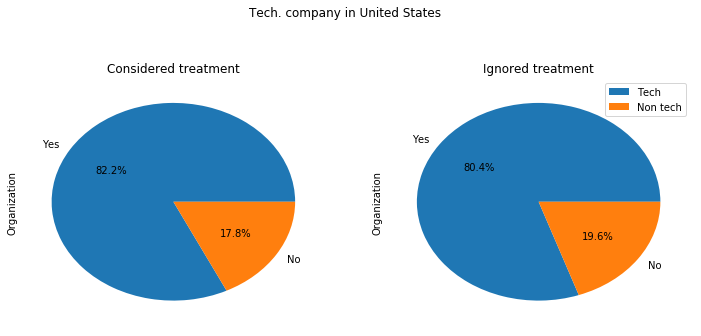

In [127]:
# tech employer in US 
us_tech_yes = df["tech_company"][(df["Country"]=="United States") & (df["treatment"]=="Yes")].value_counts()
plt.figure(figsize=(12,10))
plt.subplot(221)
us_tech_yes.plot(kind="pie", autopct="%1.1f%%")
plt.title("Considered treatment")
plt.ylabel("Organization")

us_tech_no = df["tech_company"][(df["Country"]=="United States") & (df["treatment"]=="No")].value_counts()
plt.subplot(222)
us_tech_no.plot(kind="pie", autopct="%1.1f%%")
plt.title("Ignored treatment")
plt.ylabel("Organization")
plt.legend(["Tech","Non tech"])
plt.suptitle("Tech. company in United States")

Text(0.5,0.98,'Received health benefits in United States')

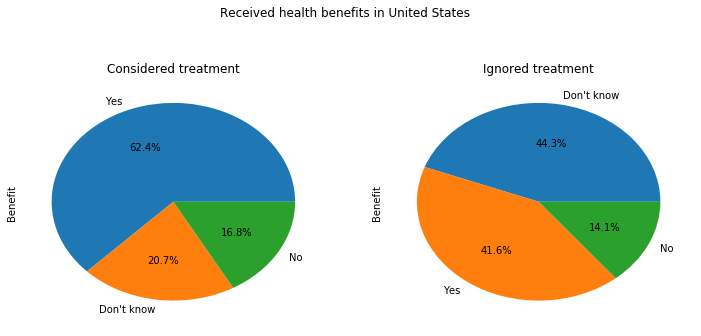

In [131]:
# employer give health benefits in US
us_ben_yes = df["benefits"][(df["Country"]=="United States") & (df["treatment"]=="Yes")].value_counts()
plt.figure(figsize=(12,10))
plt.subplot(221)
us_ben_yes.plot(kind="pie", autopct="%1.1f%%")
plt.title("Considered treatment")
plt.ylabel("Benefit")

us_ben_no = df["benefits"][(df["Country"]=="United States") & (df["treatment"]=="No")].value_counts()
plt.subplot(222)
us_ben_no.plot(kind="pie", autopct="%1.1f%%")
plt.title("Ignored treatment")
plt.ylabel("Benefit")
plt.suptitle("Received health benefits in United States")

There are 67% and 84% of male employees in United States who considered and ignored health issue respectively. The percentage of female employees involves in health treatment is 15% higher than the one who ignores health issue. Most of the employees who receive benefits from their employer considered highly their medical treatment, more than 60%. Only 17% employees choose not to use their health benefits and 21% do not know about the benefits provided by the employer. For almost 42% employees who received health benefits ignore their treatment. There are around 2% of employees work in tech. company consider to use their health treatment rather than ignore it. However almost 2% of the employees in non tech company prefer to ignore their health problem. 

6.3 Employees condition in United Kingdom

Text(0.5,0.98,'Condition in United Kingdom')

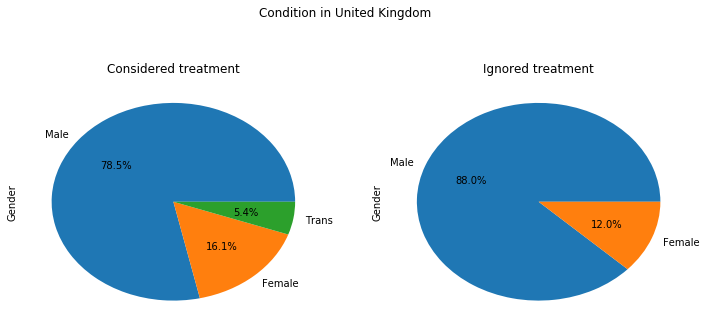

In [641]:
# employees gender in UK and receive health treatment
uk_yes = df["Gender"][(df["Country"]=="United Kingdom") & (df["treatment"]=="Yes")].value_counts()
plt.figure(figsize=(12,10))
plt.subplot(221)
uk_yes.plot(kind="pie", autopct="%1.1f%%")
plt.title("Considered treatment")
# employees gender in UK and do not receive health treatment
uk_no = df["Gender"][(df["Country"]=="United Kingdom") & (df["treatment"]=="No")].value_counts()
plt.subplot(222)
uk_no.plot(kind="pie", autopct="%1.1f%%")
plt.title("Ignored treatment")
plt.suptitle("Condition in United Kingdom")

Text(0.5,0.98,'Tech. company in United Kingdom')

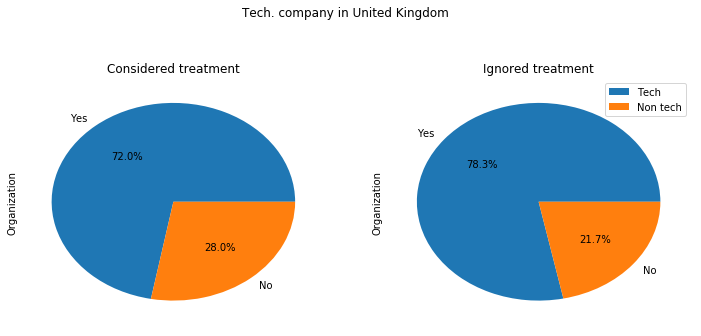

In [132]:
# tech employer in UK
uk_tech_yes = df["tech_company"][(df["Country"]=="United Kingdom") & (df["treatment"]=="Yes")].value_counts()
plt.figure(figsize=(12,10))
plt.subplot(221)
uk_tech_yes.plot(kind="pie", autopct="%1.1f%%")
plt.title("Considered treatment")
plt.ylabel("Organization")

uk_tech_no = df["tech_company"][(df["Country"]=="United Kingdom") & (df["treatment"]=="No")].value_counts()
plt.subplot(222)
uk_tech_no.plot(kind="pie", autopct="%1.1f%%")
plt.title("Ignored treatment")
plt.ylabel("Organization")
plt.legend(["Tech", "Non tech"])
plt.suptitle("Tech. company in United Kingdom")

Text(0.5,0.98,'Received health benefits in United Kingdom')

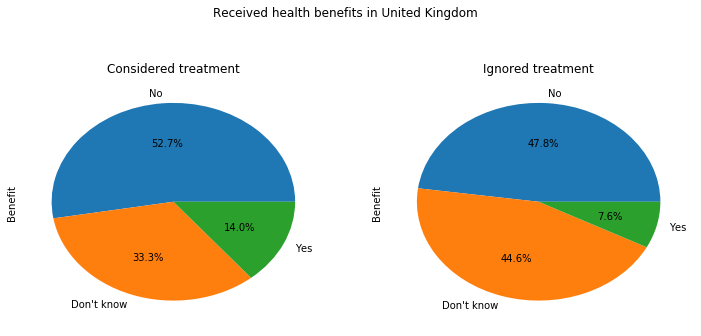

In [647]:
# employer give health benefits in US
uk_ben_yes = df["benefits"][(df["Country"]=="United Kingdom") & (df["treatment"]=="Yes")].value_counts()
plt.figure(figsize=(12,10))
plt.subplot(221)
uk_ben_yes.plot(kind="pie", autopct="%1.1f%%")
plt.title("Considered treatment")
plt.ylabel("Benefit")

uk_ben_no = df["benefits"][(df["Country"]=="United Kingdom") & (df["treatment"]=="No")].value_counts()
plt.subplot(222)
uk_ben_no.plot(kind="pie", autopct="%1.1f%%")
plt.title("Ignored treatment")
plt.ylabel("Benefit")
plt.suptitle("Received health benefits in United Kingdom")

There are 10% more male employees in UK who do not care about health treatment than consider it. However 16% of female employees consider their health issue as an important issue. Around 5% trans gender employees treat their health issue seriously. 72% of tech employees consider mental health treatment and 78% ignore it. Only 14% of benefit receivers consider health treatment while more than 50% employees without benefits still get health treatment. More than 44% employees ignore their health treatment and do not know whether they receive benefits from their employer. Almost 48% employees without benefits ignore their health and less than 8% benefit receivers ignore their treatment.

6.4 Health treatment and family history

['No', 'Yes']


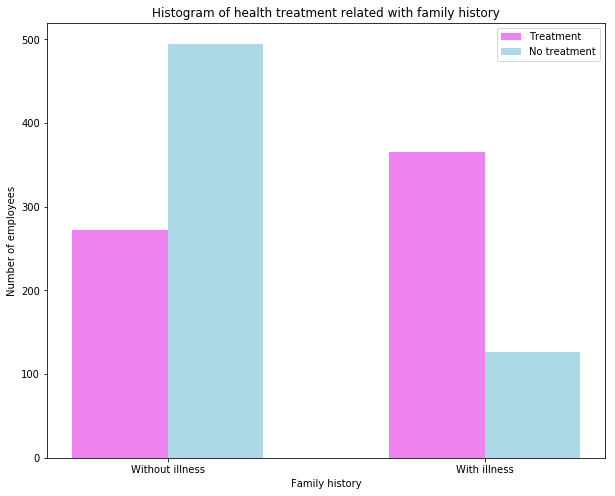

In [257]:
# employees family history and receive health treatment
fam_tr_yes = df["family_history"][(df["treatment"]=="Yes")].value_counts()
# employees family history and do not receive health treatment
fam_tr_no = df["family_history"][(df["treatment"]=="No")].value_counts()
fam_index = sorted(fam_tr_yes.index)
print(fam_index)
ind = np.arange(2)
width = 0.3
# histogram of employee with family health background 
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(ind-width/2, fam_tr_yes.loc[fam_index], width=width, color="Violet", label="Treatment")
ax.bar(ind+width/2, fam_tr_no.loc[fam_index], width=width, color="LightBlue", label="No treatment")
ax.set_xticks(ind)
ax.set_xticklabels(["Without illness","With illness"])
ax.set_xlabel("Family history")
ax.set_ylabel("Number of employees")
ax.set_title("Histogram of health treatment related with family history")
ax.legend(["Treatment","No treatment"])

Employees without history of mental illness in their families are likely to ignore their health treatment, while employees with illness history consider their mental treatment more better. The ratio of employees without and with family mental background who received treatment is 5:6. With no treatment, then the ratio is 2:1.

6.5 Working place and health treatment 

['No', 'Yes']


Text(0.5,1,'Histogram of health treatment in working place')

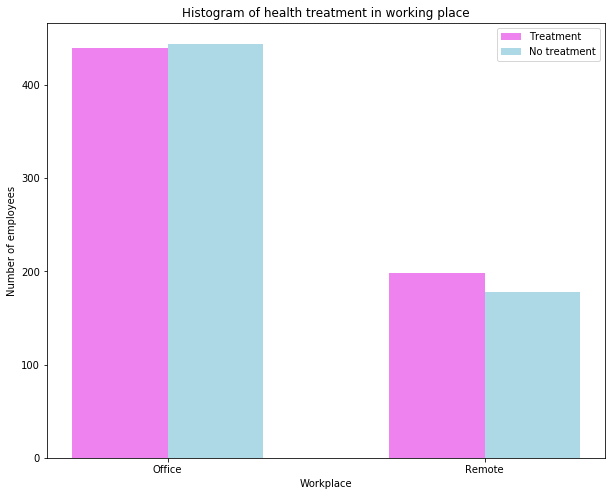

In [648]:
# employees working place and receive health treatment
rem_tr_yes = df["remote_work"][(df["treatment"]=="Yes")].value_counts()
# employees working place and do not receive health treatment
rem_tr_no = df["remote_work"][(df["treatment"]=="No")].value_counts()
rem_index = sorted(rem_tr_yes.index)
print(rem_index)
ind = np.arange(2)
width = 0.3
# histogram of employees workplace and their health treatment
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(ind-width/2, rem_tr_yes.loc[rem_index], width=width, color="Violet", label="Treatment")
ax.bar(ind+width/2, rem_tr_no.loc[rem_index], width=width, color="LightBlue", label="No treatment")
ax.set_xticks(ind)
ax.set_xticklabels(["Office","Remote"])
ax.legend(["Treatment","No treatment"])
ax.set_xlabel("Workplace")
ax.set_ylabel("Number of employees")
ax.set_title("Histogram of health treatment in working place")

The number of employees in the office is equally considered and ignored their mental health issue, while employees work remotely get mental treatment slightly better. 

6.6 Influence of health treatment in working place

['Never', 'Often', 'Rarely', 'Sometimes']


Text(0.5,1,'Histogram of health treatment influenced work')

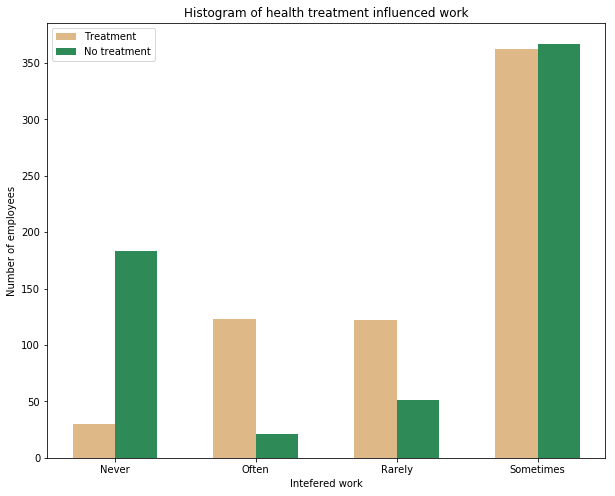

In [649]:
# health effect at working place 
work_tr_yes = df["work_interfere"][(df["treatment"]=="Yes")].value_counts()
work_tr_no = df["work_interfere"][(df["treatment"]=="No")].value_counts()
work_index = sorted(work_tr_yes.index)
print(work_index)
ind = np.arange(4)
width = 0.3
# histogram of employees effectiveness in their working place 
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(ind-width/2, work_tr_yes.loc[work_index], width=width, color="BurlyWood", label="Treatment")
ax.bar(ind+width/2, work_tr_no.loc[work_index], width=width, color="SeaGreen", label="No treatment")
ax.set_xticks(ind)
ax.set_xticklabels(["Never","Often","Rarely","Sometimes"])
ax.legend(["Treatment","No treatment"])
ax.set_xlabel("Intefered work")
ax.set_ylabel("Number of employees")
ax.set_title("Histogram of health treatment influenced work")

Most of employees, above 450 people, feel that their mental health problem influences their work. More than 100 employees often feel they are underperformed when receiving health treatment and only 25 person still feels underperformed although without any health treatment. Less than 50 employees received treatment but never influenced their work and consistently employees without health treatment have no influence on their work performance.

6.7 Company size and health treatment

1-5                91
6-25              128
26-100            150
100-500            95
500-1000           27
More than 1000    146
Name: no_employees, dtype: int64


Text(0.5,1,'Histogram of health treatment in different companies')

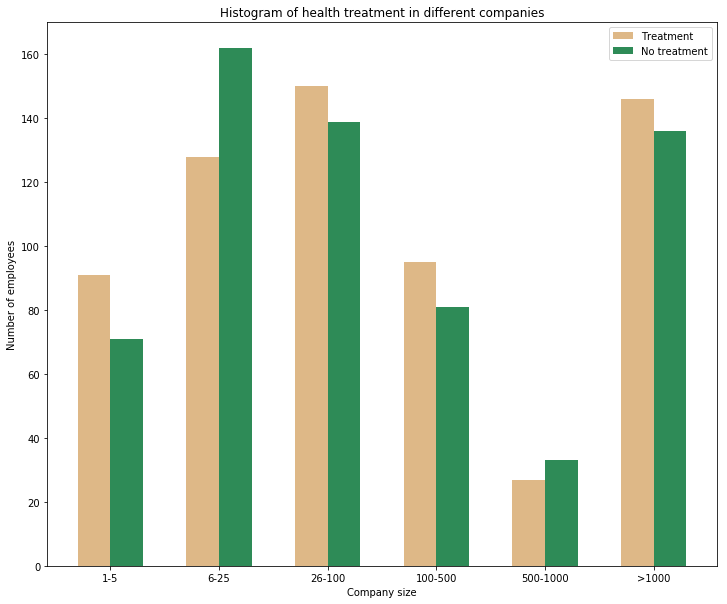

In [602]:
emp_tr_yes = df["no_employees"][(df["treatment"]=="Yes")].value_counts()
emp_tr_no = df["no_employees"][(df["treatment"]=="No")].value_counts()
emp_index = ["1-5","6-25","26-100","100-500","500-1000","More than 1000"]
print(emp_tr_yes.loc[emp_index])
ind = np.arange(6)
width = 0.3
# histogram of employees in different company related with their health issue
fig, ax = plt.subplots(figsize=(12,10))
ax.bar(ind-width/2, emp_tr_yes.loc[emp_index], width=width, color="BurlyWood", label="Treatment")
ax.bar(ind+width/2, emp_tr_no.loc[emp_index], width=width, color="SeaGreen", label="No treatment")
ax.set_xticks(ind)
ax.set_xticklabels(["1-5","6-25","26-100","100-500","500-1000",">1000"])
ax.legend(["Treatment","No treatment"])
ax.set_xlabel("Company size")
ax.set_ylabel("Number of employees")
ax.set_title("Histogram of health treatment in different companies")

Employees work in small size companies are likely to avoid health treatment compared to the middle size companies. For large size companies, more than 500 employees, there are almost same number of employees who receive and do not receive health treatment.

6.8 Tech company and health treatment

['No', 'Yes']


Text(0.5,1,'Histogram of health treatment in tech. company')

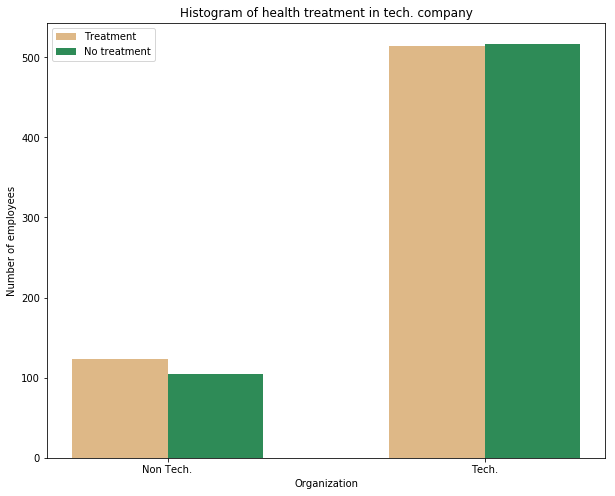

In [603]:
tech_tr_yes = df["tech_company"][(df["treatment"]=="Yes")].value_counts()
tech_tr_no = df["tech_company"][(df["treatment"]=="No")].value_counts()
tech_index = sorted(tech_tr_yes.index)
print(tech_index)
ind = np.arange(2)
width = 0.3
# histogram of employees in tech and non tech company
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(ind-width/2, tech_tr_yes.loc[tech_index], width=width, color="BurlyWood", label="Treatment")
ax.bar(ind+width/2, tech_tr_no.loc[tech_index], width=width, color="SeaGreen", label="No treatment")
ax.set_xticks(ind)
ax.set_xticklabels(["Non Tech.","Tech."])
ax.legend(["Treatment","No treatment"])
ax.set_xlabel("Organization")
ax.set_ylabel("Number of employees")
ax.set_title("Histogram of health treatment in tech. company")

Number of employees worked in tech company are preferred to get and neglect their health treatment equally, while non tech employees have more awareness for treating their mental health treatment.

6.9 Health treatment and employer benefits

["Don't know", 'No', 'Yes']


Text(0.5,1,'Histogram of health treatment with benefits')

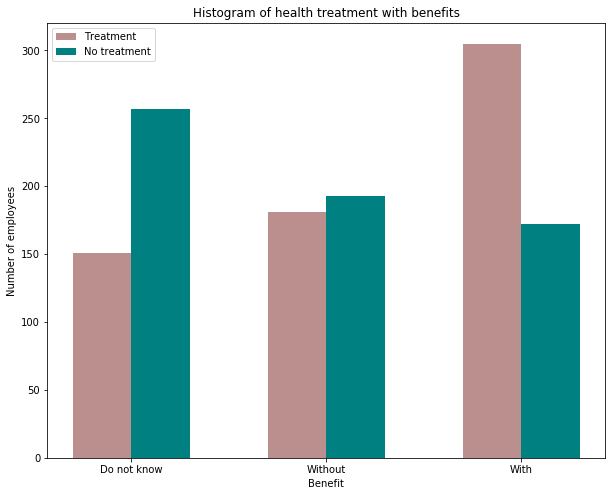

In [605]:
# health beneficiary and receive health treatment
ben_tr_yes = df["benefits"][(df["treatment"]=="Yes")].value_counts()
# health beneficiary and do not receive health treatment
ben_tr_no = df["benefits"][(df["treatment"]=="No")].value_counts()
ben_index = sorted(ben_tr_yes.index)
print(ben_index)
ind = np.arange(3)
width = 0.3
# histogram of benefit receivers
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(ind-width/2, ben_tr_yes.loc[ben_index], width=width, color="RosyBrown", label="Treatment")
ax.bar(ind+width/2, ben_tr_no.loc[ben_index], width=width, color="Teal", label="No treatment")
ax.set_xticks(ind)
ax.set_xticklabels(["Do not know","Without", "With"])
ax.legend(["Treatment","No treatment"])
ax.set_xlabel("Benefit")
ax.set_ylabel("Number of employees")
ax.set_title("Histogram of health treatment with benefits")

Around 300 employees examine their mental health and less than 200 employees ignore it when the employer give health benefits. While employees without benefits are more likely to ignore their health treatment. Likewise people who do not know about company health benefits, they do not take the health treatment.

6.10 Wellness program and health treatment

["Don't know", 'No', 'Yes']


Text(0.5,1,'Histogram of health treatment with wellness program')

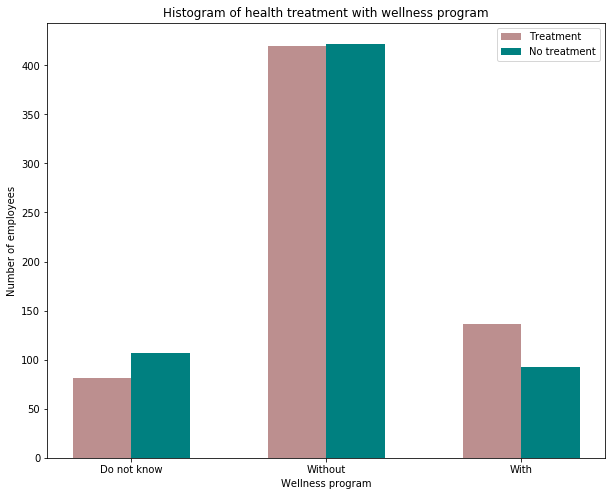

In [606]:
wel_tr_yes = df["wellness_program"][(df["treatment"]=="Yes")].value_counts()
wel_tr_no = df["wellness_program"][(df["treatment"]=="No")].value_counts()
wel_index = sorted(wel_tr_yes.index)
print(wel_index)
ind = np.arange(3)
width = 0.3
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(ind-width/2, wel_tr_yes.loc[wel_index], width=width, color="RosyBrown", label="Treatment")
ax.bar(ind+width/2, wel_tr_no.loc[wel_index], width=width, color="Teal", label="No treatment")
ax.set_xticks(ind)
ax.set_xticklabels(["Do not know","Without", "With"])
ax.legend(["Treatment","No treatment"])
ax.set_xlabel("Wellness program")
ax.set_ylabel("Number of employees")
ax.set_title("Histogram of health treatment with wellness program")

Employees worked in companies without wellness program are equally to use and avoid their health treatment. However in company with wellness program, the employees have tendency to get their health treatment but with a small number of participants. Employees who do not know anything about wellness program from their employer tend to neglect the health issue.

# 7. Model prediction

In [138]:
# prepare data for generating model
data = df.copy()
data = data.drop(columns=["Timestamp","Age"])
data = data.rename(columns={"AgeRange":"Age"})
print(data.columns)

Index([u'Gender', u'Country', u'self_employed', u'family_history',
       u'treatment', u'work_interfere', u'no_employees', u'remote_work',
       u'tech_company', u'benefits', u'care_options', u'wellness_program',
       u'seek_help', u'anonymity', u'leave', u'mental_health_consequence',
       u'phys_health_consequence', u'coworkers', u'supervisor',
       u'mental_health_interview', u'phys_health_interview',
       u'mental_vs_physical', u'obs_consequence', u'Age', u'Year'],
      dtype='object')


In [140]:
# repeat label mapping step
label_dict = {}
for col in data:
    # use LabelEncoder to normalize category label into 0 - n_category-1
    encoder = LabelEncoder()
    encoder.fit(data[col])
    map_name = dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
    data[col] = encoder.transform(data[col])
    # save category label in some variables
    lkey = col + "_label"
    lval = [map_name]
    label_dict[lkey] = lval

print(data.describe())

            Gender      Country  self_employed  family_history    treatment  \
count  1259.000000  1259.000000    1259.000000     1259.000000  1259.000000   
mean      0.820492    37.792693       0.115965        0.390786     0.505957   
std       0.425192    13.320224       0.320310        0.488121     0.500163   
min       0.000000     0.000000       0.000000        0.000000     0.000000   
25%       1.000000    42.000000       0.000000        0.000000     0.000000   
50%       1.000000    45.000000       0.000000        0.000000     1.000000   
75%       1.000000    45.000000       0.000000        1.000000     1.000000   
max       2.000000    47.000000       1.000000        1.000000     1.000000   

       work_interfere  no_employees  remote_work  tech_company     benefits  \
count     1259.000000   1259.000000  1259.000000   1259.000000  1259.000000   
mean         1.749801      2.783161     0.298650      0.818904     1.054805   
std          1.264719      1.740247     0.457848   

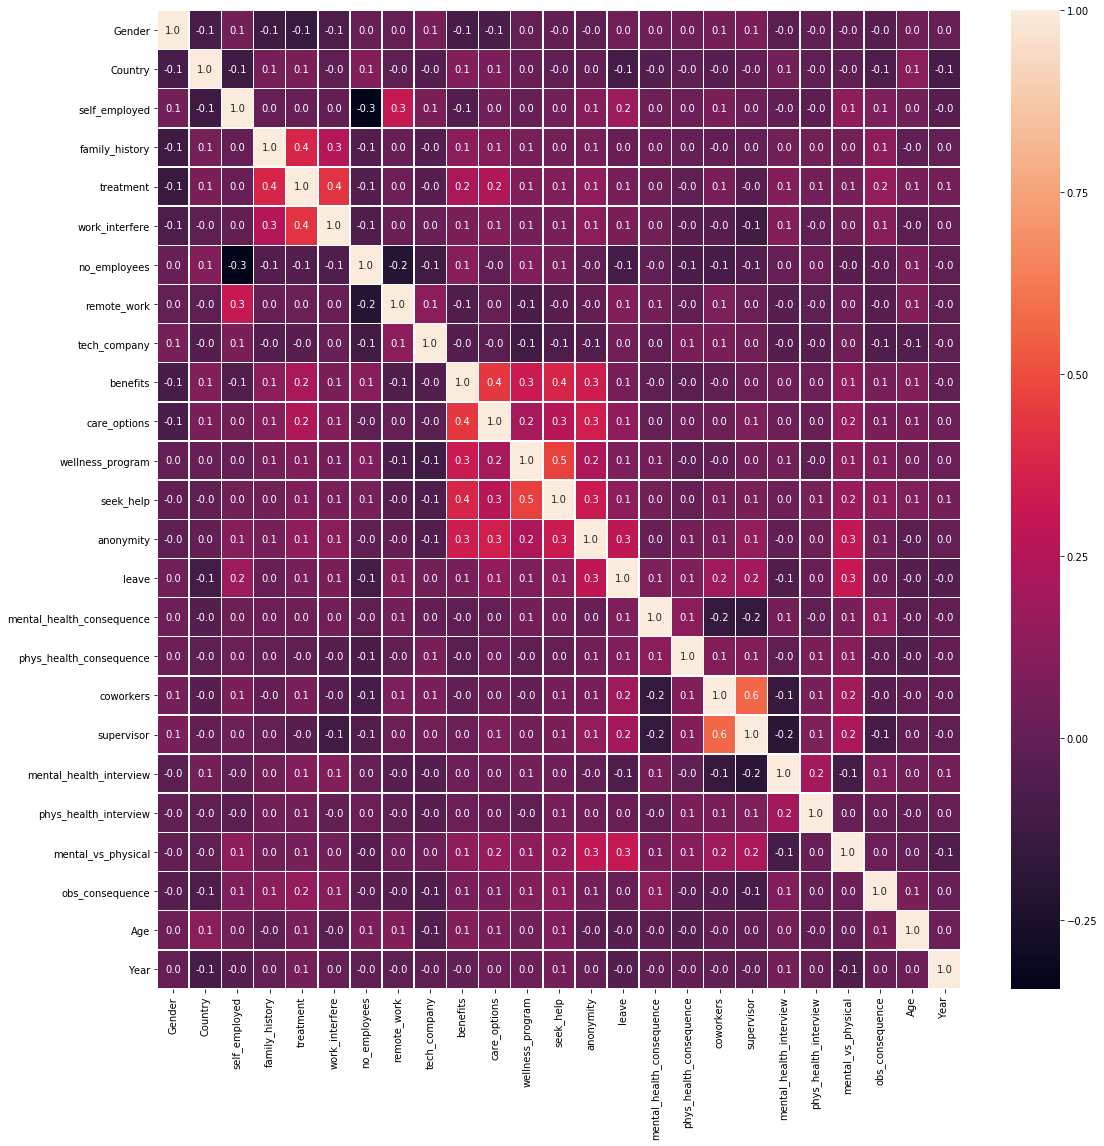

In [141]:
# data correlation
plt.figure(figsize=(18,18))
sn.heatmap(data.corr(),annot=True,linewidth=.5,fmt= '.1f')

In [142]:
# normalize data between 0-1
mms = MinMaxScaler()
dat_norm = mms.fit_transform(data.drop(columns=["treatment"]))
# assume treatment as data label
y = data["treatment"]
# split data into training and testing samples
x_train, x_test, y_train, y_test = train_test_split(dat_norm,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)

(881, 24)
(378, 24)


Using different classifiers to understand the performance of the models. Here we try to train the data using Naive Bayes, Nearest Neighbors, SVM, and Random Forest

7.1 Gaussian Naive Bayes

In [148]:
# Gaussian Naive Bayes without using grid cross-validation
nb = GaussianNB()
nb.fit(x_train,y_train)
print(nb)
print("Accuracy: %.3f" % nb.score(x_test,y_test))
y_pred = nb.predict(x_test)
print("F1-score: %.3f" % f1_score(y_test,y_pred)) 
print("Precision: %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test,y_pred))

GaussianNB(priors=None)
Accuracy: 0.741
F1-score: 0.743
Precision: 0.768
Recall: 0.721


7.2 K-nearest neighbors

In [150]:
# nearest neighbors params for cross validation
params = {"n_neighbors":[5,8,10,12,15],"algorithm":("ball_tree","kd_tree","brute"),"leaf_size":[5,10,20,30,50]}
# knn classifier
knn = KNeighborsClassifier()
# perform grid search
grid = GridSearchCV(knn,params)
grid.fit(x_train,y_train)
# best estimator
print(grid.best_estimator_)
# accuracy metrics
print("Accuracy: %.3f" %(grid.score(x_test,y_test)))
y_pred = grid.predict(x_test)
print("F1-score: %.3f" % f1_score(y_test,y_pred))
print("Precision: %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test,y_pred))

KNeighborsClassifier(algorithm='kd_tree', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')
Accuracy: 0.717
F1-score: 0.725
Precision: 0.734
Recall: 0.716


7.3 Support Vector Machine

In [151]:
# svm params for cross validation
params = {"kernel":("linear","poly","rbf","sigmoid"),"C":[0.1,1,10,100],"gamma":[0.5,0.1,1],"coef0":[0.01,0.5,0.1],"degree":[1,3,5,7]}
# support vector classification
svc = SVC(probability=True)
# perform grid search
grid = GridSearchCV(svc,params)
grid.fit(x_train,y_train)
# best estimator
print(grid.best_estimator_)
# accuracy metrics
print("Accuracy: %.3f" %(grid.score(x_test,y_test)))
y_pred = grid.predict(x_test)
print("F1-score: %.3f" % f1_score(y_test,y_pred))
print("Precision: %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test,y_pred))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.01,
  decision_function_shape='ovr', degree=1, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy: 0.733
F1-score: 0.752
Precision: 0.729
Recall: 0.777


7.3 Random Forest

In [154]:
# random forest params for cross validation
params = {"n_estimators":[5,10,15,20,30],"max_features":("sqrt","log2"),"max_depth":[10,20,50,100],"min_samples_split":[2,5,10],"criterion":["gini","entropy"]}
# random forest classifier
rf = RandomForestClassifier()
# perform grid search
grid = GridSearchCV(rf,params)
grid.fit(x_train,y_train)
# best estimator
print(grid.best_estimator_)
# accuracy metrics
print("Accuracy: %.3f" %(grid.score(x_test,y_test)))
y_pred = grid.predict(x_test)
print("F1-score: %.3f" % f1_score(y_test,y_pred))
print("Precision: %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test,y_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy: 0.759
F1-score: 0.780
Precision: 0.745
Recall: 0.817


In [166]:
# feature selection step
# get feature importance
ft_importances = grid.best_estimator_.feature_importances_
# feature name
features = data.drop(columns=["treatment"]).columns
# sorting feature based on their importance value
indices = np.argsort(ft_importances)[::-1]
print("Feature importances:")
print(features[indices])

Feature importances:
Index([u'work_interfere', u'family_history', u'care_options', u'Country',
       u'no_employees', u'Gender', u'benefits', u'coworkers', u'leave',
       u'phys_health_interview', u'supervisor', u'mental_health_interview',
       u'mental_health_consequence', u'seek_help', u'mental_vs_physical',
       u'obs_consequence', u'anonymity', u'phys_health_consequence',
       u'wellness_program', u'remote_work', u'Age', u'self_employed',
       u'tech_company', u'Year'],
      dtype='object')


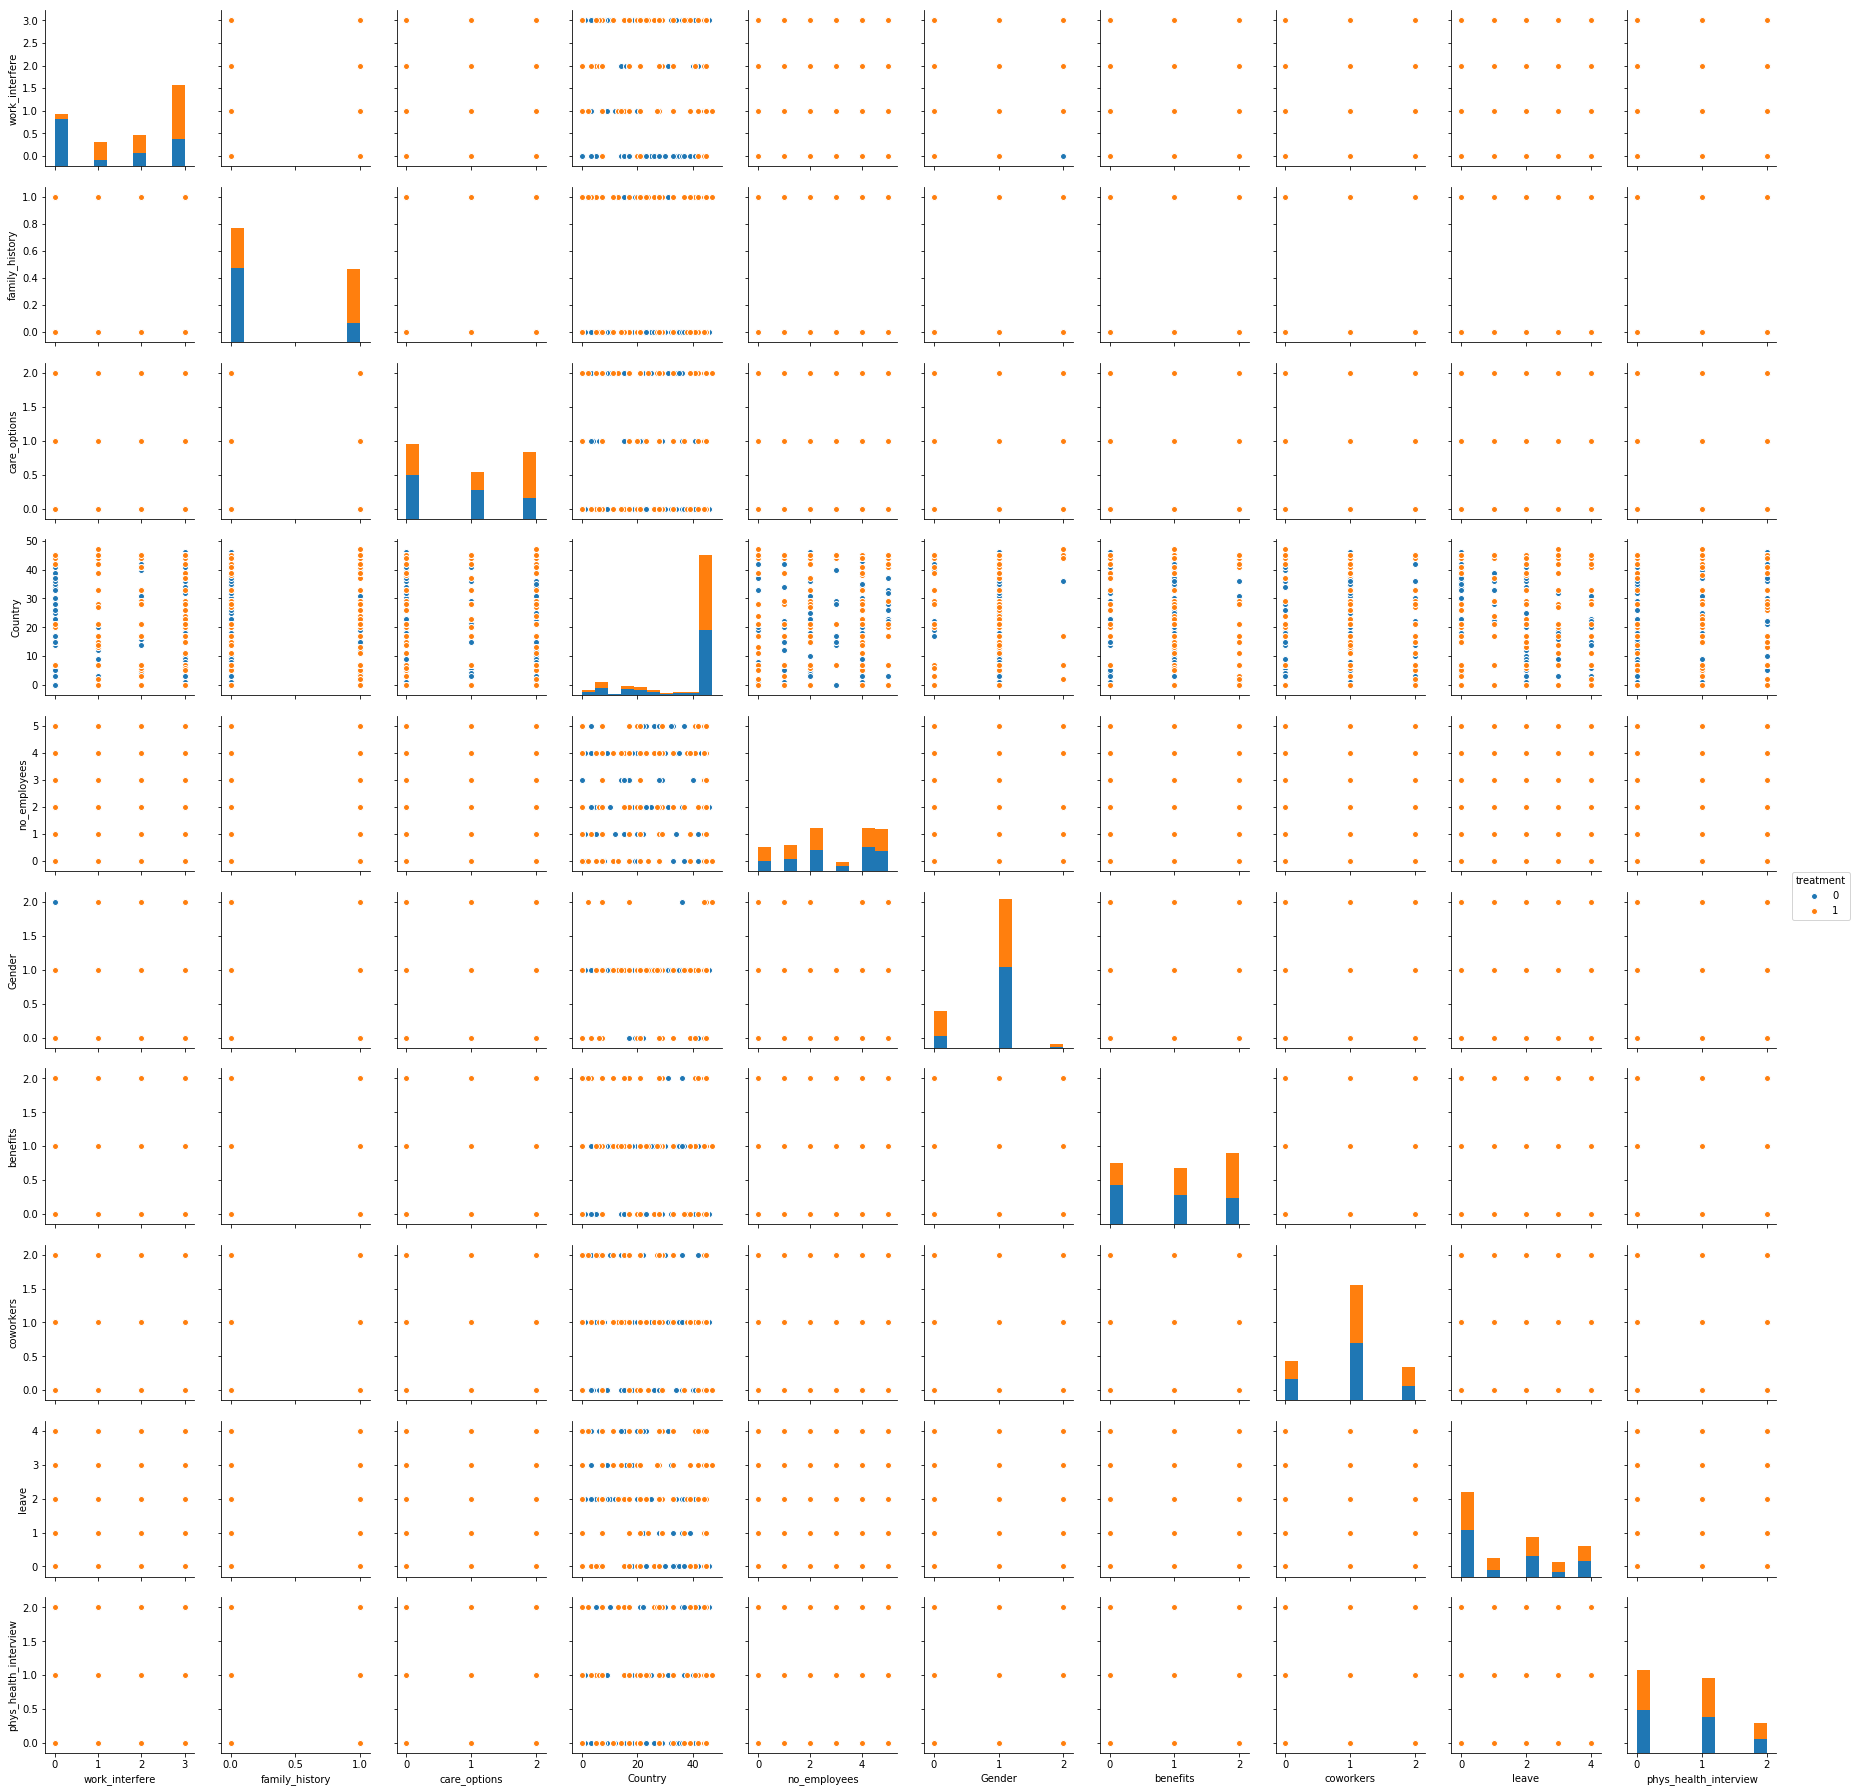

In [157]:
# plot 10 highest importance features 
sn.pairplot(data,vars=["work_interfere","family_history","care_options","Country","no_employees","Gender","benefits","coworkers","leave","phys_health_interview"],hue="treatment")

In [173]:
# normalize data between 0-1
mms = MinMaxScaler()
# dimensional reduction, select top 10 importance features
x = data[["work_interfere","family_history","care_options","Country","no_employees","Gender","benefits","coworkers","leave","phys_health_interview"]]
dat_simple = mms.fit_transform(x)
# assume treatment as data label
y = data["treatment"]
# split data into training and testing samples
x_train, x_test, y_train, y_test = train_test_split(dat_simple,y,test_size=0.3,random_state=42)
# random forest params for cross validation
params = {"n_estimators":[5,10,15,20,30],"max_features":("sqrt","log2"),"max_depth":[10,20,50,100],"min_samples_split":[2,5,10],"criterion":["gini","entropy"]}
# random forest classifier
rf = RandomForestClassifier()
# perform grid search
grid = GridSearchCV(rf,params)
grid.fit(x_train,y_train)
# best estimator
print(grid.best_estimator_)
# accuracy metrics
print("Accuracy: %.3f" %(grid.score(x_test,y_test)))
y_pred = grid.predict(x_test)
print("F1-score: %.3f" % f1_score(y_test,y_pred))
print("Precision: %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test,y_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy: 0.780
F1-score: 0.799
Precision: 0.764
Recall: 0.838


Summary:
1. More male employees in the data.
2. The data is gathered from employees from age between 20-60.
3. United States and United Kingdom have the most employees in the data set.
4. The number of employees who got mental health treatment is slightly higher than ignored one.
5. Most of the employees work in small and medium size companies.
6. 70% employees work in the office and around 88% employees are self-employed. 
7. 61% employees do not have family mental problem.
8. There are more employees worked in tech company rather than non company.
9. Less than 400 employees don't have health benefits from the employers and almost 500 employees receive it. 
10. Most of the employees do know about medical leave and few of them find it difficult to use their medical leave.
11. Most of the employee do not know about the mental program provided by the employers.
12. Most of the employees do not know about the anonymity protection and observed negative consequence.
13. The negative consequence happen more often when the employee discuss about mental health discussion.
14. Most of the employees do not want to discuss about their health problem with potential employer.
15. Large number of employees choose certain cowokers to discuss about their mental health problem.
16. Most of the employees do not know about employers seriousness between mental and physical problems.
17. Employees without mental problem in their families are likely to ignore their health treatment.
18. Most of employees feel that their mental health problem influences their work.
19. Male employees tend to ignore their health treatment in US.
20. Employees in tech company tend to ignore their health treatment in UK.
21. The best estimator is Random Forest with accuracy 76%.
22. Perfomed features selection on the sample sets, we can use only 10 features rather than total of 27 features. 
23. Result from features selection is similar with the best estimator on full features.